In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

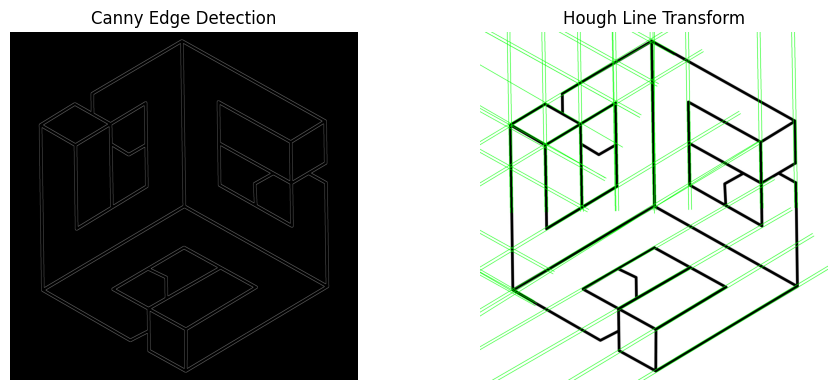

In [10]:
image = cv2.imread("E:/murugesan/Downloads/cube.jpg", cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 50, 150)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 180)

line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw the detected lines
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Plot the results
plt.figure(figsize=(10, 4))

# Show Canny edge-detected image
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Show Hough transform result
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Transform')
plt.axis('off')
plt.tight_layout()
plt.show()

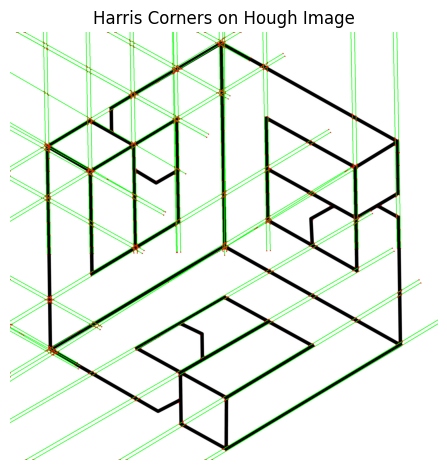

In [11]:
gray_hough = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)
gray_hough = np.float32(gray_hough)

# Harris Corner Detection
corners = cv2.cornerHarris(gray_hough, blockSize=2, ksize=3, k=0.04)
corners = cv2.dilate(corners, None)

# Mark the corners in red
line_image[corners > 0.01 * corners.max()] = [0, 0, 255]
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners on Hough Image')
plt.axis('off')
plt.tight_layout()
plt.show()

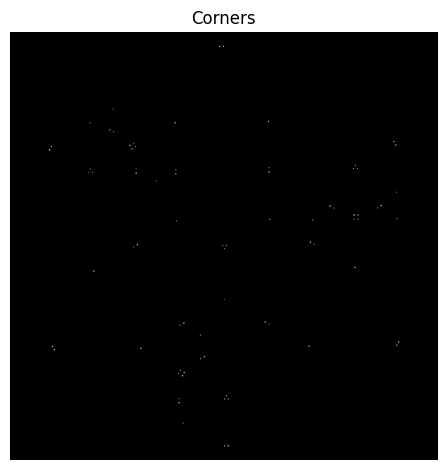

In [14]:

image = cv2.imread("E:/murugesan/Downloads/cube.jpg")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Harris Corner Detection
corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
corners = cv2.dilate(corners, None)  # Enhancing corner points

# Create a blank image to show only the detected corners
corner_image = np.zeros_like(image)  # Black image

# Mark the corners in white
corner_image[corners > 0.01 * corners.max()] = [255, 255, 255]  # White color

# Display the extracted corners
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Corners')
plt.axis('off')
plt.tight_layout()
plt.show()
